# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:  https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset
## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


hotel_update_df = pd.read_csv("Cleaned_hotel_reservations.csv")
hotel_update_df .head()


,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,INN00001,2,0,1,2,1,1,224,2017,10,2,0,0,0,65.00,0,1
1,1,INN00002,2,0,2,3,0,1,5,2018,11,6,1,0,0,106.68,1,1
2,2,INN00003,1,0,2,1,1,1,1,2018,2,28,1,0,0,60.00,0,0
3,3,INN00004,2,0,0,2,1,1,211,2018,5,20,1,0,0,100.00,0,0
4,4,INN00005,2,0,1,1,0,1,48,2018,4,11,1,0,0,94.50,0,0


In [4]:
hotel_update_df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            36275 non-null  int64  
 1   Booking_ID                            36275 non-null  object 
 2   no_of_adults                          36275 non-null  int64  
 3   no_of_children                        36275 non-null  int64  
 4   no_of_weekend_nights                  36275 non-null  int64  
 5   no_of_week_nights                     36275 non-null  int64  
 6   type_of_meal_plan                     36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  int64  
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

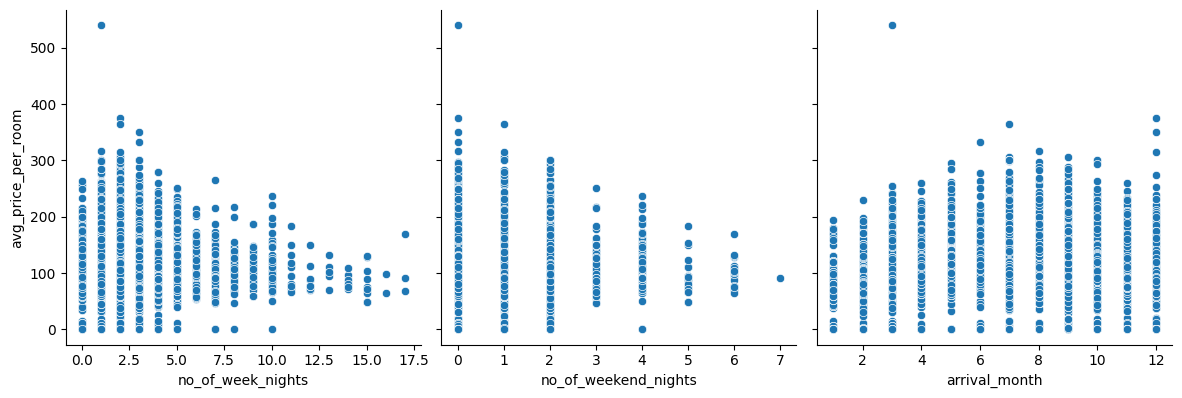

In [8]:
sns.pairplot(hotel_update_df, x_vars=['no_of_week_nights','no_of_weekend_nights','arrival_month'], 
             y_vars='avg_price_per_room', height=4, aspect=1, kind='scatter')
plt.show()

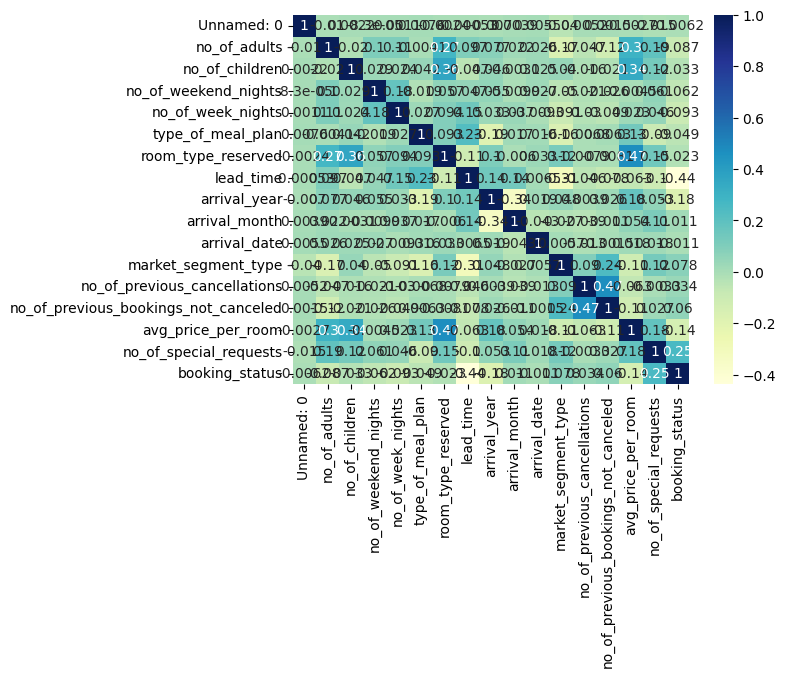

In [18]:
sns.heatmap(hotel_update_df.corr(), cmap="YlGnBu", annot = True)

plt.show()

In [19]:
hotel_update_df.corr()

,Unnamed: 0,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
Unnamed: 0,1.000000,-0.009994,0.002153,-0.000083,0.001107,0.007626,-0.002375,-0.000535,-0.006980,0.003942,0.005462,-0.040096,0.005227,0.001465,-0.002687,-0.014795,-0.006237
no_of_adults,-0.009994,1.000000,-0.019787,0.103316,0.105622,-0.004139,0.270348,0.097287,0.076719,0.021841,0.026338,-0.168176,-0.047426,-0.119166,0.296886,0.189401,-0.086920
no_of_children,0.002153,-0.019787,1.000000,0.029478,0.024398,0.042216,0.364073,-0.047091,0.045983,-0.003076,0.025482,0.040378,-0.016390,-0.021189,0.337728,0.124486,-0.033078
no_of_weekend_nights,-0.000083,0.103316,0.029478,1.000000,0.179577,-0.018762,0.057368,0.046595,0.055357,-0.009894,0.027304,-0.049987,-0.020690,-0.026312,-0.004525,0.060593,-0.061563
no_of_week_nights,0.001107,0.105622,0.024398,0.179577,1.000000,0.026888,0.094125,0.149650,0.032672,0.037376,-0.009305,-0.091066,-0.030080,-0.049344,0.022753,0.045994,-0.092996
type_of_meal_plan,0.007626,-0.004139,0.042216,-0.018762,0.026888,1.000000,0.093410,0.226712,-0.187699,0.017222,0.015952,-0.163743,-0.006799,0.006331,0.134703,-0.090276,-0.049374
room_type_reserved,-0.002375,0.270348,0.364073,0.057368,0.094125,0.093410,1.000000,-0.107793,0.103369,-0.005967,0.032919,0.116178,-0.007936,-0.008139,0.469899,0.145041,-0.022986
lead_time,-0.000535,0.097287,-0.047091,0.046595,0.149650,0.226712,-0.107793,1.000000,0.143439,0.136814,0.006479,-0.305326,-0.045723,-0.078137,-0.062596,-0.101645,-0.438538
arrival_year,-0.006980,0.076719,0.045983,0.055357,0.032672,-0.187699,0.103369,0.143439,1.000000,-0.339689,0.018849,0.047721,0.003919,0.026422,0.178605,0.053205,-0.179529
arrival_month,0.003942,0.021841,-0.003076,-0.009894,0.037376,0.017222,-0.005967,0.136814,-0.339689,1.000000,-0.042780,-0.026883,-0.038615,-0.010718,0.054423,0.110552,0.011233


## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [20]:
X = hotel_update_df['room_type_reserved']
y = hotel_update_df['avg_price_per_room']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     avg_price_per_room   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     7763.
Date:                Sat, 10 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:04:09   Log-Likelihood:            -1.2311e+05
No. Observations:               25392   AIC:                         2.462e+05
Df Residuals:                   25390   BIC:                         2.462e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 82.8573      0.305    271.424      0.000      82.259      83.456
room_type_reserved    12.1682      0.138     88.106      0.000      11.897      12.439
==============================================================================
Omnibus:                     2867.656   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28514.082
Skew:                          -0.002   Prob(JB):                         0.00
Kurtosis:                       8.191   Cond. No.                         3.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

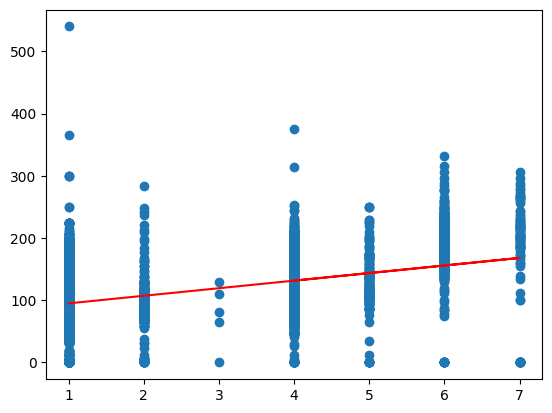

In [22]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 82.857 + 12.168*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

/Users/prathimabharathi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


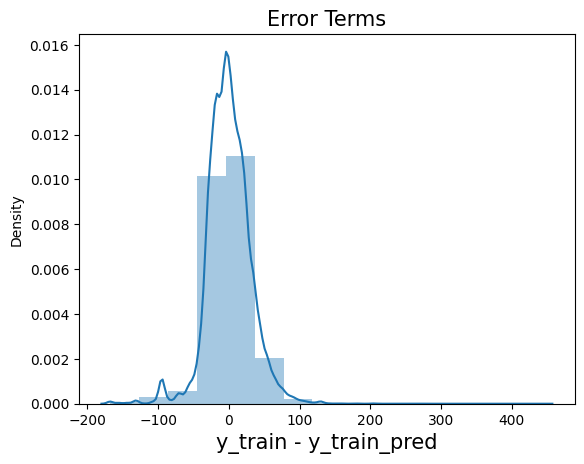

In [23]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.234
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case as there is not much of a linear relationship between the independent variables
3. Was your plot of the error terms a bell curve?The plot of error terms was almost a bell curve.